# EXPERIMENT 9

# COMPARISION OF KMP ALGO AND RARP ALGO

In [16]:
import numpy as np
import time

### RABIN KARP ALGO

In [17]:
def Rksearch(pat, txt, q): 
    M = len(pat) 
    N = len(txt) 
    i = 0
    j = 0
    p = 0     
    t = 0     
    h = 1
    d=0
  
    for i in range(M-1): 
        h = (h*d)%q 
    for i in range(M): 
        p = (d*p + ord(pat[i]))%q 
        t = (d*t + ord(txt[i]))%q 
    for i in range(N-M+1): 
        if p==t: 
            for j in range(M): 
                if txt[i+j] != pat[j]: 
                    break
            j+=1
#             if j==M: 
#                 print("Pattern found at index " + str(i)) 

        if i < N-M: 
            t = (d*(t-ord(txt[i])*h) + ord(txt[i+M]))%q   
            if t < 0: 
                t = t+q 

### KMP ALGO

In [18]:
def KMPSearch(pat, txt): 
    M = len(pat) 
    N = len(txt) 
    lps = [0]*M 
    j = 0 
    computePrefix(pat, M, lps) 
    i = 0  
    while i < N: 
        if pat[j] == txt[i]: 
            i += 1
            j += 1
  
        if j == M: 
#             print("Found pattern at index " + str(i-j)) 
            j = lps[j-1] 
        elif i < N and pat[j] != txt[i]: 
            if j != 0: 
                j = lps[j-1] 
            else: 
                i += 1

def computePrefix(pat, M, lps): 
    len = 0 
    lps[0]  
    i = 1
    while i < M: 
        if pat[i]== pat[len]: 
            len += 1
            lps[i] = len
            i += 1
        else: 
            if len != 0: 
                len = lps[len-1] 
            else: 
                lps[i] = 0
                i += 1
  



In [19]:
size=[1000,10000,30000,50000,80000,100000,150000,250000,300000,350000,400000,450000,500000]
pattern='sdssfsvs'

In [20]:
string=[]
for i in size:
    p=np.random.randint(65,91,i)
    s=''
    for j in p:
        s= s+chr(j)
    s= s+'sdssfsvs'
    string.append(s)

In [21]:
string[0]

'JXRDJVSWUVAHKUHWIAVZPTXZEXWXLTVGDQGBJQLQWIVHFGFGYAVHNNBMCGNQEQXYYSPYMRJUJJHUUINLISTWNQWMCQLOYRIAIAFESRUCFOAHMLKPJQWWNJPWKVUVKWVHRXBJPOHFRZFFHJELKOGSQEBFTEGXMIQVLRFSWSUGURQGIIUVMDDRKZCWJSRJSRQTOUXNGPICLAPAEORVLGJKEYXLITVUZXHLHMNFVFODXGEHJMITQHCFVUQCPYANWIQYQUURMIDPOTPCKJPCGKBHTTCFTBUFGLAZPSVVSFKVEGXWLJMMIYMRERQFFZEUVOLCBVKDKXCBGAYXEYLSKCJUHOWPKVRSAXLOIUEGGWPXPAAOKPKSXFCQLZTFKZWLBOUCYAODNUWKKOXCFORDBKKCVVDZVWJTPOUUHORCZALEIOJDQSRQTQVBEEVBUASSIRVUNSNCVQCTPJERSVBKPZMXQLRJCIVUCPPKIEDSPSUMOQDOFVBLQCALRYMAYTYLROOMIFRICJSNSGLLUFOCEVWFKQCJPCRHZRRSUQWXSJYBKDZPUSQQFZUPMXXGSDGMTAXILQXIMJEEDCVGQOUJPLOULEMUQPUMPFGCZULRNPYIXKWHGDNHYGFQLXHVEXPCOIATUCOEAFBTZBVHXLKBSOCUJTIEOOUCXZGPSMGFOXKOJOVBXSLSHPCTHHOHXVRIBGCMLDEBGPZSCUVYUFMNIWHBCFPOXQDUKHWJZHAOJWDVOZVVIIYTOKEBHASBRLKXKVELGIMEYLPMUNPATUGZBMEIBXJJQPDAPWUAOOJGAUZWHFPINVIDBJIQNXERZLKDXYGQURBLLMRIJZQRLREOHUQUQKKSMEVVUGLYTTEERFCDOHNDILUBTSSVFJYPOHCFCQPMZBPPOUKIALXFSOXHHZIWGVYNLEBGJGOGZHTHQJRQLGKYGEWLKCYKHCWXBXXBAWFJRXDCRLNQCRTXIWXVQUVGCPHCAXFZGRTOEDCCEUU

In [22]:
timrk=[]
timkmp=[]

In [23]:
for i,j in enumerate(string):
    start_time=time.time()
    Rksearch(pattern,j,11)
    timrk.append(time.time()-start_time)
    start_time=time.time()
    KMPSearch(pattern,j)
    timkmp.append(time.time()-start_time)


In [24]:
timkmp


[0.0,
 0.0029904842376708984,
 0.005950212478637695,
 0.010937929153442383,
 0.015956640243530273,
 0.01894855499267578,
 0.0299074649810791,
 0.04987955093383789,
 0.05984044075012207,
 0.06981372833251953,
 0.07878541946411133,
 0.08978486061096191,
 0.10069489479064941]

In [25]:
timrk

[0.0,
 0.006979465484619141,
 0.01399683952331543,
 0.022971391677856445,
 0.031950950622558594,
 0.040892839431762695,
 0.060849905014038086,
 0.10073065757751465,
 0.12166237831115723,
 0.14164280891418457,
 0.16157054901123047,
 0.18149423599243164,
 0.20442867279052734]

### COMPARISION GRAPH

In [26]:
import matplotlib.pyplot as plt

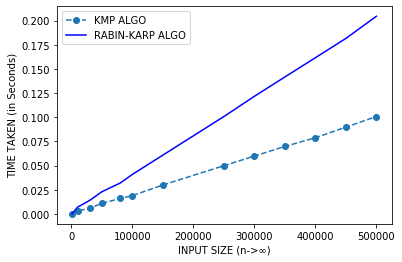

In [27]:
plt.plot(size,timkmp,'--o',label='KMP ALGO')
plt.plot(size,timrk,'-b',label='RABIN-KARP ALGO')
plt.xlabel('INPUT SIZE (n->∞)')
plt.ylabel('TIME TAKEN (in Seconds)')
plt.legend()
plt.show()